# EPL Standing Prediction

#Collecting Data

In [ ]:
import pandas as pd

team_stat = pd.read_csv("/content/BXH_2_season.csv")
player_stat = pd.read_csv("/content/Football-Players-Stats-EPL-2020-2021-and-2021-2022.csv")
head_to_head_stat = pd.read_csv("/content/Untitled-spreadsheet-data_3_season-1 - Untitled-spreadsheet-data_3_season-1.csv")

In [ ]:
team_stat.head()

,Team,P,W,D,L,GF,GA,GD,Pts,xG,xGA,xPTS,Season,Standing
0,Man City,38,27,5,6,83,32,51,86,77.72,30.61,83.38,2021,1
1,Man United,38,21,11,6,73,44,29,74,63.17,41.92,65.64,2021,2
2,Liverpool,38,20,9,9,68,42,26,69,72.21,47.30,68.80,2021,3
3,Chelsea,38,19,10,9,58,36,22,67,68.66,30.90,77.41,2021,4
4,Leicester,38,20,6,12,68,50,18,66,58.80,47.07,59.75,2021,5


In [ ]:
player_stat.head()

,No,Player,Team,Seasons,Apps,Min,G,A,xG,xA
0,1,Alexandre Lacazette,Arsenal,2021,31,1939,13,2,12.03,2.21
1,2,Pierre-Emerick Aubameyang,Arsenal,2021,29,2333,10,3,10.45,2.43
2,3,Nicolas Pepe,Arsenal,2021,29,1602,10,1,6.00,1.01
3,4,Bukayo Saka,Arsenal,2021,32,2577,5,3,7.17,4.51
4,5,Gabriel,Arsenal,2021,23,1994,2,0,1.56,0.06


In [ ]:
head_to_head_stat.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,HST,AS,AST,Season,Result,HomePass,AwayPass,HomePassAccuracy,AwayPassAccuracy,HomePossession,AwayPossession,HomeExpectedGoals,AwayExpectedGoals
0,31-12-20,Newcastle,Liverpool,0,0,8,2,11,4,2021,1,241,661,0.65,0.86,0.26,0.74,0.82,1.32
1,31-10-21,Norwich,Leeds United,1,2,14,3,13,6,2022,0,310,345,0.67,0.73,0.47,0.53,0.66,1.17
2,31-10-21,Aston Villa,West Ham,1,4,9,3,21,9,2022,0,333,459,0.73,0.83,0.42,0.58,0.69,2.66
3,31-10-20,Burnley,Chelsea,0,3,5,0,14,9,2021,0,392,693,0.75,0.87,0.36,0.64,0.41,1.23
4,31-10-20,Wolverhampton,Crystal Palace,2,0,15,5,11,2,2021,2,446,552,0.84,0.90,0.45,0.55,1.35,0.80


# Preprocessing Data

Merge all datasets into one dataset

In [ ]:
import pandas as pd

# Load the head-to-head data
head_to_head = pd.read_csv('/content/Untitled-spreadsheet-data_3_season-1 - Untitled-spreadsheet-data_3_season-1.csv')

# Load the player data
player_data = pd.read_csv('/content/Football-Players-Stats-EPL-2020-2021-and-2021-2022.csv')

# Drop unwanted columns from player data
player_data = player_data.drop(['No', 'Apps', 'Min'], axis=1)

# Merge the head-to-head data with player data
merged_data = pd.merge(head_to_head, player_data, left_on=['HomeTeam', 'Season'], right_on=['Team', 'Seasons'])
merged_data = pd.merge(merged_data, player_data, left_on=['AwayTeam', 'Season'], right_on=['Team', 'Seasons'], suffixes=('_home', '_away'))

# Drop duplicate columns
merged_data = merged_data.drop(['Team_home', 'Team_away', 'Seasons_home', 'Seasons_away'], axis=1)
merged_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,HST,AS,AST,Season,...,Player_home,G_home,A_home,xG_home,xA_home,Player_away,G_away,A_away,xG_away,xA_away
0,31-12-20,Newcastle,Liverpool,0,0,8,2,11,4,2021,...,Callum Wilson,12,5,13.59,3.05,Mohamed Salah,22,5,20.25,6.53
1,31-12-20,Newcastle,Liverpool,0,0,8,2,11,4,2021,...,Callum Wilson,12,5,13.59,3.05,Sadio Mané,11,7,14.83,7.79
2,31-12-20,Newcastle,Liverpool,0,0,8,2,11,4,2021,...,Callum Wilson,12,5,13.59,3.05,Roberto Firmino,9,7,12.86,6.12
3,31-12-20,Newcastle,Liverpool,0,0,8,2,11,4,2021,...,Callum Wilson,12,5,13.59,3.05,Diogo Jota,9,0,7.06,1.76
4,31-12-20,Newcastle,Liverpool,0,0,8,2,11,4,2021,...,Callum Wilson,12,5,13.59,3.05,Georginio Wijnaldum,2,0,2.82,1.66


In [ ]:
# Load previous season standings
team_data = pd.read_csv('/content/BXH_2_season.csv')
# Calculate the result for the away team based on the result for the home team
merged_data['result_away'] = merged_data['Result'].apply(lambda x: 2 if x == 0 else 1 if x == 1 else 0)

# Group head-to-head data by home team
grouped = merged_data.groupby(['HomeTeam', 'AwayTeam']).mean()[['FTHG', 'FTAG','HS','HST','AS','AST','Result','HomePass','AwayPass','HomePassAccuracy','AwayPassAccuracy',
                                                                   'HomePossession','AwayPossession','HomeExpectedGoals','AwayExpectedGoals','result_away','G_home','A_home',
                                                                   'xG_home','xA_home','G_away','A_away','xG_away','xA_away']].reset_index()

# Merge the head-to-head data and previous season standings on the team names
data = pd.merge(team_data, grouped, left_on='Team', right_on='HomeTeam')
data['team'] = data['Team'].fillna(data['HomeTeam'])

# Drop 'Team' and 'team_name' columns
data = data.drop(['Team', 'HomeTeam'], axis=1)

team_col = data.pop('team')
data.insert(0, 'team', team_col)
# # Drop 'Team' and 'team_name' columns
# data = data.drop([ 'Season'], axis=1)


# Round col1 and col2 to integer
data[['Result', 'result_away','Season']] = data[['Result', 'result_away','Season']].round().astype(int)
data.to_csv("/content/data.csv")

In [ ]:
# data = pd.read_csv("/content/data.csv")
data


,team,P,W,D,L,GF,GA,GD,Pts,xG,...,AwayExpectedGoals,result_away,G_home,A_home,xG_home,xA_home,G_away,A_away,xG_away,xA_away
0,Man City,38,27,5,6,83,32,51,86,77.72,...,0.478455,0,3.555079,2.357654,3.499494,2.472103,2.025751,1.414878,2.114664,1.364835
1,Man City,38,27,5,6,83,32,51,86,77.72,...,0.395876,0,3.577424,2.368307,3.532394,2.493430,1.843705,1.450072,1.822547,1.351881
2,Man City,38,27,5,6,83,32,51,86,77.72,...,0.460000,0,3.692308,2.423077,3.701538,2.603077,1.586207,1.103448,1.835862,1.319310
3,Man City,38,27,5,6,83,32,51,86,77.72,...,0.149366,0,3.557402,2.358761,3.502915,2.474320,1.492447,1.004532,1.996299,1.355574
4,Man City,38,27,5,6,83,32,51,86,77.72,...,0.749449,0,3.554257,2.357262,3.498285,2.471319,1.335559,0.964942,1.677830,1.244157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,Norwich,38,5,7,26,23,84,-61,22,31.51,...,1.130000,0,0.750000,0.571429,1.134643,0.854643,1.640000,1.040000,1.938400,1.348800
858,Norwich,38,5,7,26,23,84,-61,22,31.51,...,3.820000,2,0.750000,0.571429,1.134643,0.854643,2.520000,2.000000,2.758800,2.104400
859,Norwich,38,5,7,26,23,84,-61,22,31.51,...,2.420000,2,0.750000,0.571429,1.134643,0.854643,1.100000,0.866667,1.325667,1.060333
860,Norwich,38,5,7,26,23,84,-61,22,31.51,...,3.260000,2,0.750000,0.571429,1.134643,0.854643,2.320000,1.840000,2.250000,1.548800


In [ ]:
data.columns

Index(['team', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA',
       'xPTS', 'Season', 'Standing', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'HST',
       'AS', 'AST', 'Result', 'HomePass', 'AwayPass', 'HomePassAccuracy',
       'AwayPassAccuracy', 'HomePossession', 'AwayPossession',
       'HomeExpectedGoals', 'AwayExpectedGoals', 'result_away', 'G_home',
       'A_home', 'xG_home', 'xA_home', 'G_away', 'A_away', 'xG_away',
       'xA_away'],
      dtype='object')

Checking Missing Values

In [ ]:
data.isnull().sum()

team                 0
P                    0
W                    0
D                    0
L                    0
GF                   0
GA                   0
GD                   0
Pts                  0
xG                   0
xGA                  0
xPTS                 0
Season               0
Standing             0
AwayTeam             0
FTHG                 0
FTAG                 0
HS                   0
HST                  0
AS                   0
AST                  0
Result               0
HomePass             0
AwayPass             0
HomePassAccuracy     0
AwayPassAccuracy     0
HomePossession       0
AwayPossession       0
HomeExpectedGoals    0
AwayExpectedGoals    0
result_away          0
G_home               0
A_home               0
xG_home              0
xA_home              0
G_away               0
A_away               0
xG_away              0
xA_away              0
dtype: int64

Feature Scaling

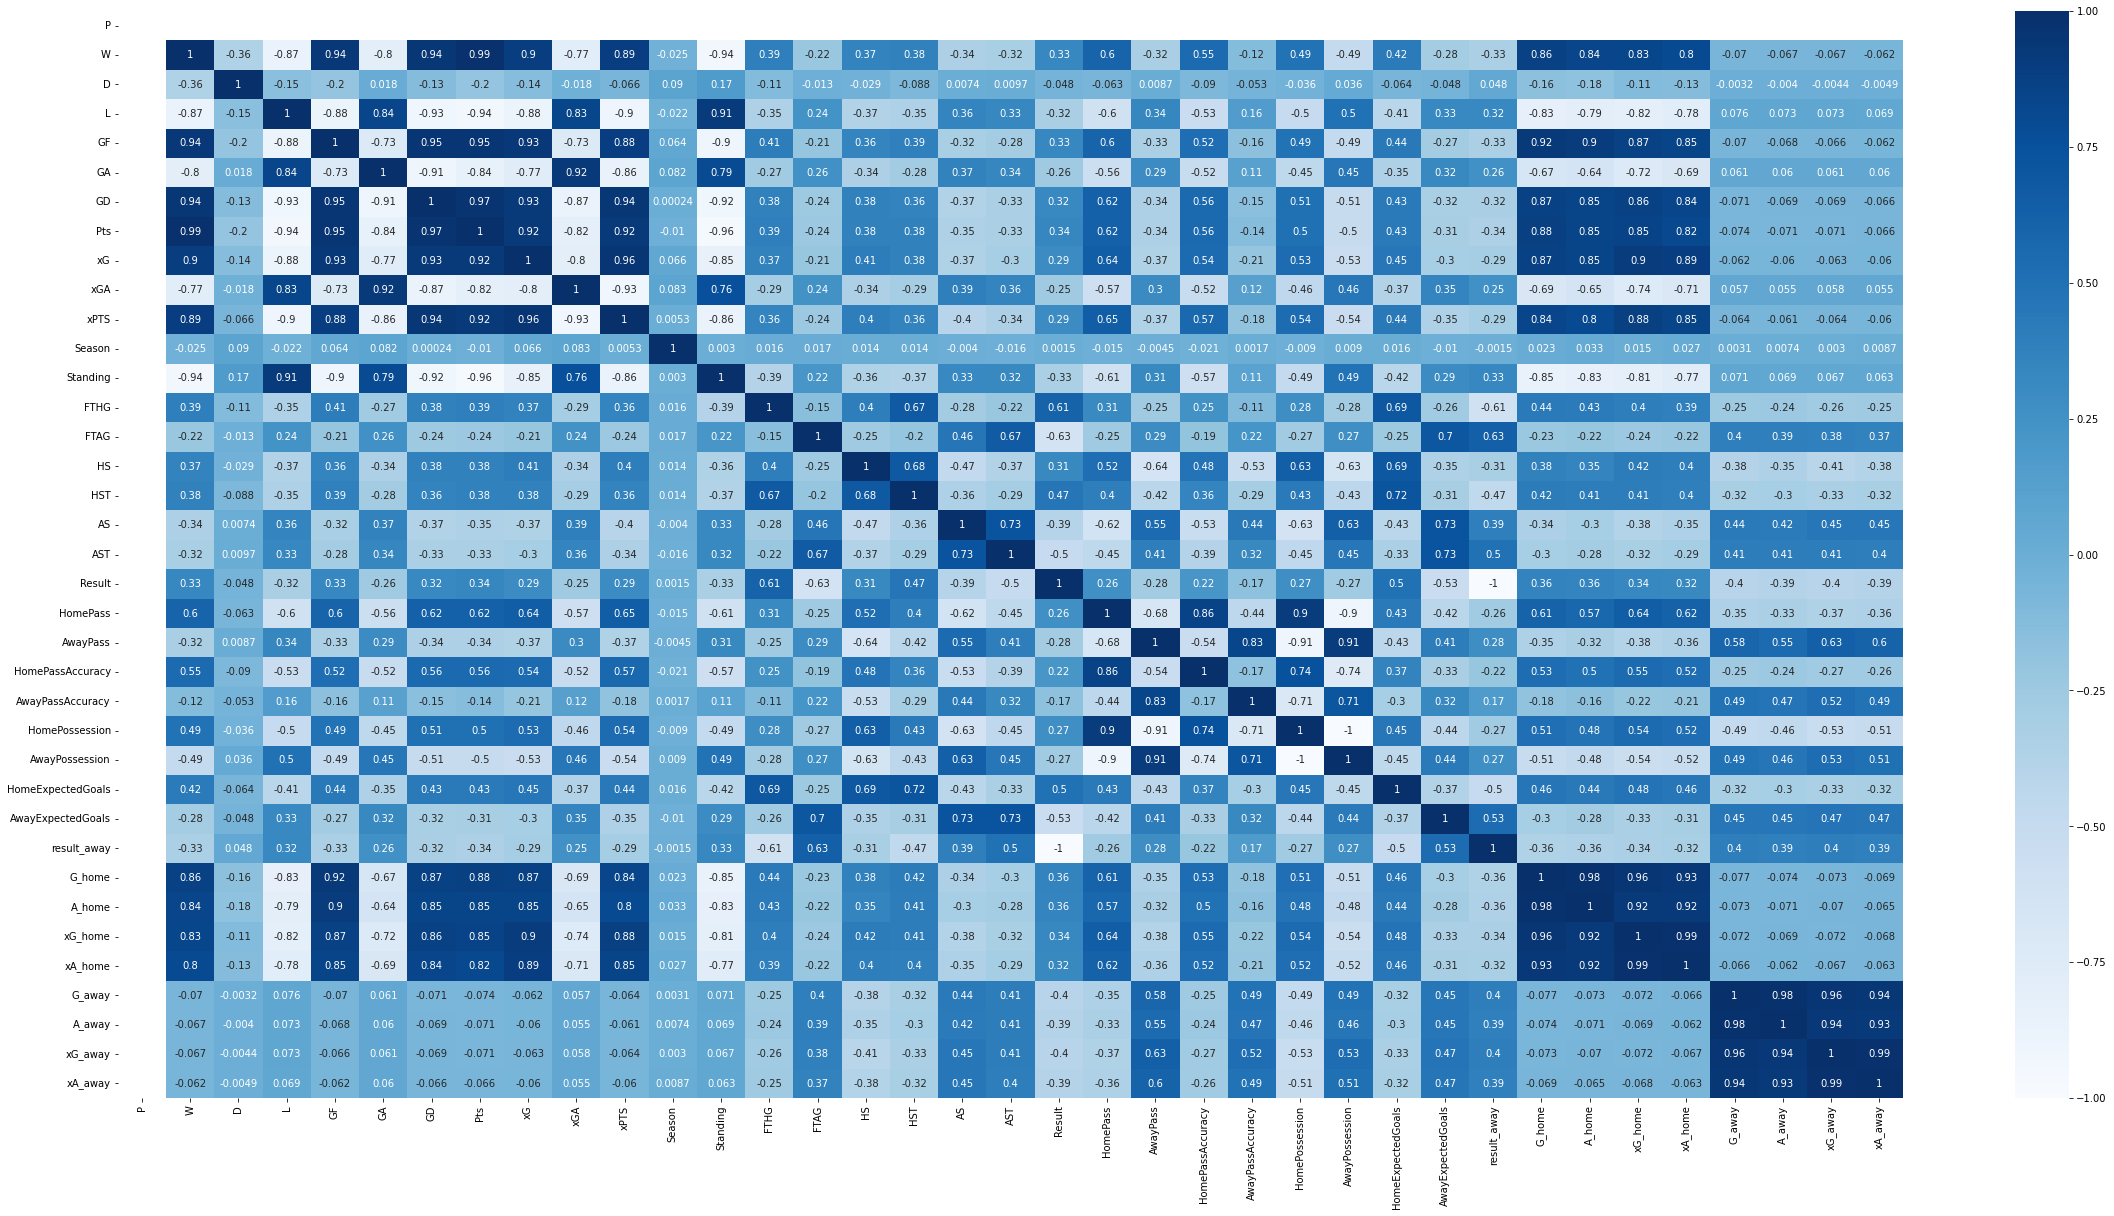

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Blues)
plt.show()

# Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

X = data[["W","GF","GD","G_home","A_home","HomePassAccuracy","HomePass","HomePossession","HS","HST","FTHG","Result"]]
y = data['Pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred.round())
print('Mean squared error:', mse)
r2 = model.score(X_test,y_test)
print('R Square          :', r2)

Mean squared error: 0.005780346820809248
R Square          : 0.9999629348690167


Linear regression

In [ ]:
from sklearn import datasets, linear_model, metrics

model1 = linear_model.LinearRegression()

model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
mse_1 = mean_squared_error(y_test, y_pred1.round())
print('Mean squared error:', mse_1)
r2_1 = model1.score(X_test,y_test)
print('R Square          :', r2_1)

Mean squared error: 4.7514450867052025
R Square          : 0.9843121532154038


# Data Visualization

Tree graph

[Text(0.5372023809523809, 0.95, 'W <= 15.5\nsquared_error = 296.95\nsamples = 435\nvalue = 53.128'),
 Text(0.24107142857142858, 0.85, 'W <= 8.0\nsquared_error = 79.724\nsamples = 237\nvalue = 40.056'),
 Text(0.11904761904761904, 0.75, 'G_home <= 1.19\nsquared_error = 20.376\nsamples = 58\nvalue = 26.784'),
 Text(0.09523809523809523, 0.65, 'GD <= -42.0\nsquared_error = 4.888\nsamples = 46\nvalue = 24.782'),
 Text(0.047619047619047616, 0.55, 'W <= 5.5\nsquared_error = 0.225\nsamples = 24\nvalue = 22.658'),
 Text(0.023809523809523808, 0.45, 'squared_error = 0.0\nsamples = 7\nvalue = 22.0'),
 Text(0.07142857142857142, 0.45, 'squared_error = 0.0\nsamples = 17\nvalue = 23.0'),
 Text(0.14285714285714285, 0.55, 'A_home <= 0.655\nsquared_error = 0.96\nsamples = 22\nvalue = 26.8'),
 Text(0.11904761904761904, 0.45, 'squared_error = 0.0\nsamples = 8\nvalue = 28.0'),
 Text(0.16666666666666666, 0.45, 'squared_error = 0.0\nsamples = 14\nvalue = 26.0'),
 Text(0.14285714285714285, 0.65, 'squared_error 

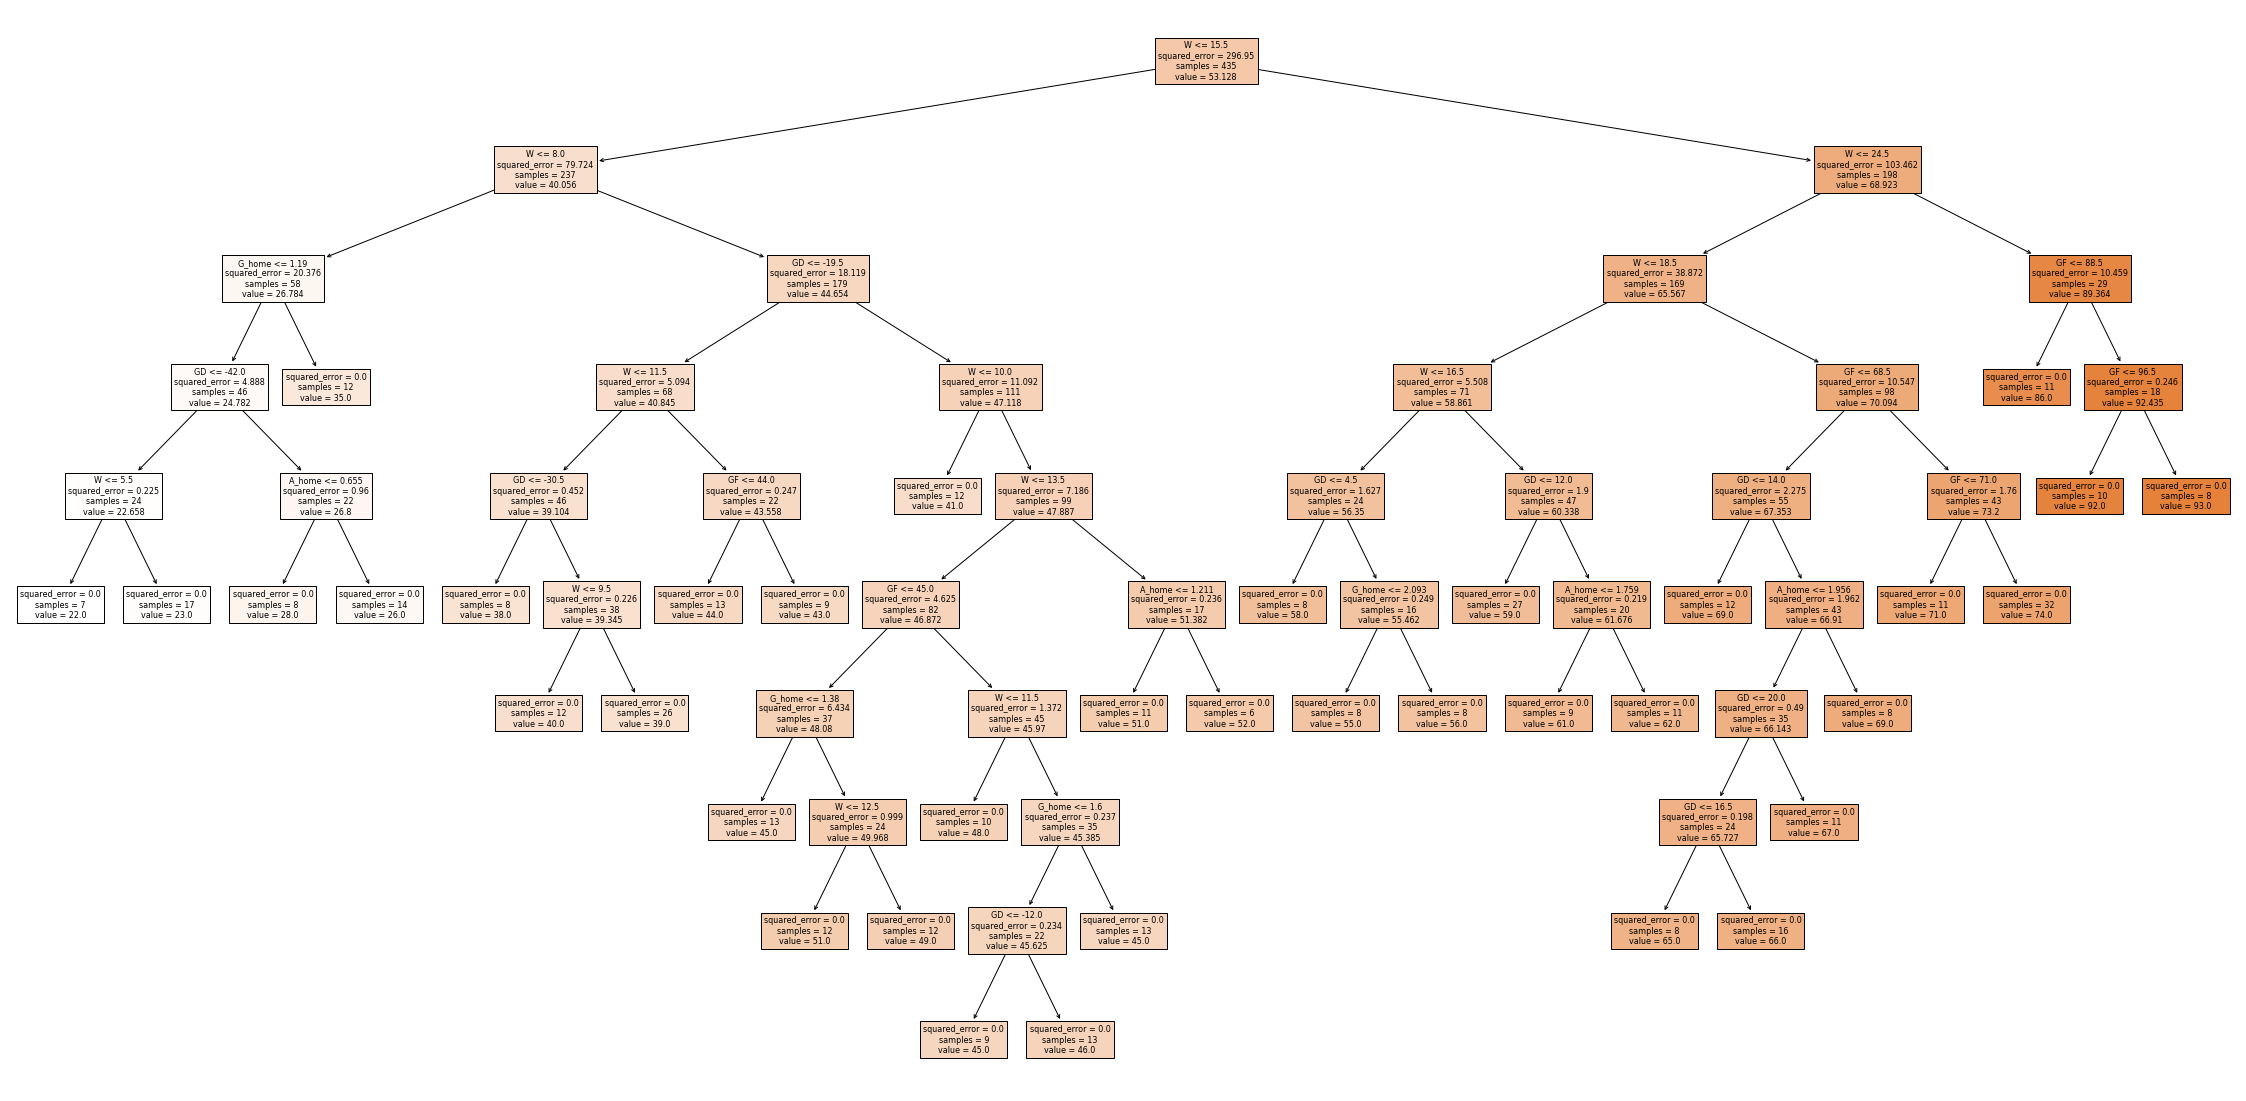

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
from sklearn import tree

plt.figure(figsize=(40,20)) 
tree.plot_tree(model.estimators_[0], feature_names=X_train.columns, filled=True)

Calculate win rate by home/away team

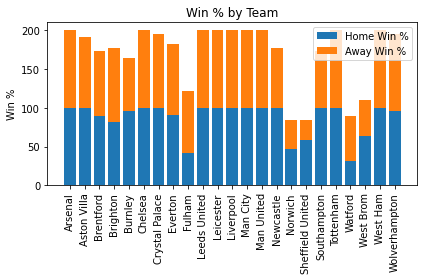

In [ ]:
import matplotlib.pyplot as plt

# Calculate win percentage for each team
home_win_percentages = []
away_win_percentages = []
teams = []
data_grp = data.groupby(['team', 'AwayTeam']).mean()

for team in data_grp.index.levels[0]:
    total_games_home = data_grp.loc[team]['Result'].count()
    total_wins_home = data_grp.loc[team]['Result'].sum()
    total_wins_away = data_grp.loc[(slice(None), team), 'result_away'].sum()
    total_games_away = data_grp.loc[(slice(None), team), 'result_away'].count()
    total_wins = total_wins_home + total_wins_away
    total_games = total_games_home + total_games_away
    home_win_percent = (total_wins_home / total_games_home) * 100
    away_win_percent = (total_wins_away / total_games_away) * 100
    
    if home_win_percent > 100:
        home_win_percent = 100
    if away_win_percent > 100:
        away_win_percent = 100
    
    home_win_percentages.append(home_win_percent)
    away_win_percentages.append(away_win_percent)
    teams.append(team)

# Create a bar chart of win percentages for each team
fig, ax = plt.subplots()
ax.bar(teams, home_win_percentages, label='Home Win %')
ax.bar(teams, away_win_percentages, bottom=home_win_percentages, label='Away Win %')
ax.set_ylabel('Win %')
ax.set_title('Win % by Team')
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Radar chart

In [ ]:
import pandas as pd
import plotly.graph_objs as go

df_2021 = data.loc[data['Season'] == 2021]
df_2022 = data.loc[data['Season'] == 2022]
df_avg_2021 = df_2021.mean()
df_avg_2022 = df_2022.mean()

teams = data['team'].unique().tolist()

for team in teams:
    # Filter data for the current team
    data_2021 = df_2021.loc[df_2021['team'] == team]
    data_2022 = df_2022.loc[df_2022['team'] == team]

    # Create a trace for 2021 season
    if not data_2021.empty:
      r_2021=[data_2021['HomePassAccuracy'].values[0]*100, data_2021['HomePossession'].values[0]*100,data_2021['xA_home'].values[0]*25,data_2021['xG'].values[0], data_2021['xGA'].values[0]]
    else:
      r_2021=[0]*5

    trace_2021 = go.Scatterpolar(
        r=r_2021,
        theta=['HomePassAccuracy', 'HomePossession','xA_home','xG', 'xGA'],
        fill='toself',
        name='Team'
    )
    
    # Create a trace for the season's average performance
    if not data_2021.empty:
      r_2021_avg=[df_avg_2021['HomePassAccuracy']*100, df_avg_2021['HomePossession']*100, df_avg_2021['xA_home']*25, df_avg_2021['xG'], df_avg_2021['xGA']]
    else:
      r_2021_avg=[0]*5

    trace_avg_2021 = go.Scatterpolar(
        r=r_2021_avg,
        theta=['HomePassAccuracy', 'HomePossession','xA_home','xG', 'xGA'],
        fill='toself',
        name='2021 Season Average'
    )

    # Create a trace for 2022 season
    if not data_2022.empty:
      r_2022=[data_2022['HomePassAccuracy'].values[0]*100, data_2022['HomePossession'].values[0]*100,data_2022['xA_home'].values[0]*25, data_2022['xG'].values[0], data_2022['xGA'].values[0]]
    else:
      r_2022=[0]*5

    trace_2022 = go.Scatterpolar(
        r=r_2022,
        theta=['HomePassAccuracy', 'HomePossession','xA_home','xG', 'xGA'],
        fill='toself',
        name='Team'
    )
    
    # Create a trace for the season's average performance
    if not data_2022.empty:
      r_2022_avg=[df_avg_2022['HomePassAccuracy']*100, df_avg_2022['HomePossession']*100, df_avg_2022['xA_home']*25, df_avg_2022['xG'], df_avg_2022['xGA']]
    else:
      r_2022_avg=[0]*5

    trace_avg_2022 = go.Scatterpolar(
        r=r_2022_avg,
        theta=['HomePassAccuracy', 'HomePossession','xA_home','xG', 'xGA'],
        fill='toself',
        name='2022 Season Average'
    )

    # Create the layout for the chart
    layout = go.Layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        title=team,
    )

    # Create a figure for the current team
    fig1 = go.Figure(data=[trace_2021, trace_avg_2021], layout=layout)
    fig2 = go.Figure(data=[trace_2022, trace_avg_2022], layout=layout)

    # Show the figure
    fig1.show()
    fig2.show()

<ipython-input-20-1fce56b422ff>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_avg_2021 = df_2021.mean()
<ipython-input-20-1fce56b422ff>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_avg_2022 = df_2022.mean()


# Experiments

Random Forest Regressor

In [ ]:
import time
# Train the model and record the time taken
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate the model and record the time taken
start_time = time.time()
score = model.score(X_test, y_test)
eval_time = time.time() - start_time

# Print the results
print("R^2 score      : {}".format(score))
print("Training time  : {} seconds".format(train_time))
print("Evaluation time: {} seconds".format(eval_time))

R^2 score      : 0.9999629348690167
Training time  : 0.2808268070220947 seconds
Evaluation time: 0.00868988037109375 seconds


Linear regression

In [ ]:
import time
# Train the model and record the time taken
start_time1 = time.time()
model1.fit(X_train, y_train)
train_time1 = time.time() - start_time1

# Evaluate the model and record the time taken
start_time1 = time.time()
score1 = model1.score(X_test, y_test)
eval_time1 = time.time() - start_time1

# Print the results
print("R^2 score      : {}".format(score1))
print("Training time  : {} seconds".format(train_time1))
print("Evaluation time: {} seconds".format(eval_time1))

R^2 score      : 0.9843121532154038
Training time  : 0.003448963165283203 seconds
Evaluation time: 0.002104043960571289 seconds


# Prediction

Random Forest Regressor

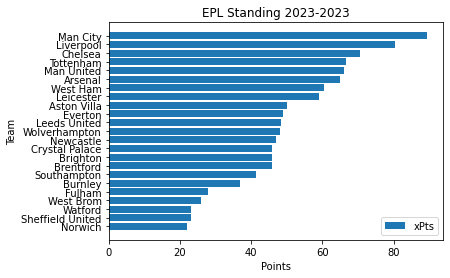

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a prediction for points stored in a list called "predicted_pts"
data['predicted_points'] = model.predict(X)

# Group the data by team and calculate the total points and predicted points
data_grp = data.groupby('team').agg({'predicted_points': 'mean'})

# Sort the data by points in ascending order
data_sorted = data_grp.sort_values(by='predicted_points')

# Create a horizontal bar chart
plt.barh(data_sorted.index, data_sorted['predicted_points'], label='xPts')

# Add axis labels and title
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('EPL Standing 2023-2023')

# Add legend
plt.legend()

plt.show()

Linear regression

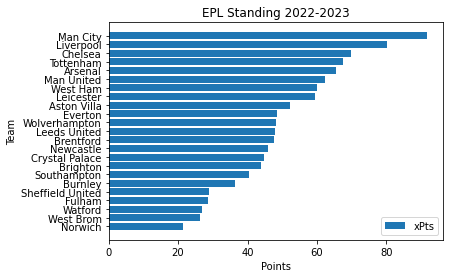

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a prediction for points stored in a list called "predicted_pts"
data['predicted_points1'] = model1.predict(X)

# Group the data by team and calculate the total points and predicted points
data_grp = data.groupby('team').agg({'predicted_points1': 'mean'})

# Sort the data by points in ascending order
data_sorted = data_grp.sort_values(by='predicted_points1')

# Create a horizontal bar chart
plt.barh(data_sorted.index, data_sorted['predicted_points1'], label='xPts')

# Add axis labels and title
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('EPL Standing 2022-2023')

# Add legend
plt.legend()

plt.show()